<a href="https://www.kaggle.com/code/souvikg544/qatar-trade?scriptVersionId=101427051" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/qatartrade1518/EVERPROD.PAN.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/kaggle/input/qatartrade1518/EVERPROD.PAN.csv')

In [4]:
df=df[df['weight']!=0]

In [5]:
df.shape

(2095077, 13)

In [6]:
df.head()

,Unnamed: 0,hs8,iso3c,year,month,port,weight,import_value,hs6,hs4,hs2,continent,region
0,0,57,ARE,2015.0,1,CARGO,813.50,23626.512,43,9,2,Asia,Western Asia
50,50,5919,KOR,2015.0,12,CARGO,3.88,563.184,4299,1041,84,Asia,Eastern Asia
51,51,5919,KOR,2015.0,2,CARGO,2.00,753.808,4299,1041,84,Asia,Eastern Asia
53,53,5919,KOR,2015.0,4,CARGO,8.50,2160.539,4299,1041,84,Asia,Eastern Asia
54,54,5919,KOR,2015.0,5,CARGO,20.74,1678.344,4299,1041,84,Asia,Eastern Asia


In [7]:
df1=df.sample(1000000)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 14920832 to 8834307
Data columns (total 13 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0    1000000 non-null  int64  
 1   hs8           1000000 non-null  int64  
 2   iso3c         1000000 non-null  object 
 3   year          1000000 non-null  float64
 4   month         1000000 non-null  int64  
 5   port          1000000 non-null  object 
 6   weight        1000000 non-null  float64
 7   import_value  1000000 non-null  float64
 8   hs6           1000000 non-null  int64  
 9   hs4           1000000 non-null  int64  
 10  hs2           1000000 non-null  int64  
 11  continent     1000000 non-null  object 
 12  region        1000000 non-null  object 
dtypes: float64(3), int64(6), object(4)
memory usage: 106.8+ MB


In [9]:
df1.describe()

,Unnamed: 0,hs8,year,month,weight,import_value,hs6,hs4,hs2
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000
mean,6.671369e+06,4208.933792,2016.534400,6.419698,2.459993e+04,2.019163e+05,3001.678630,731.920966,62.232233
std,5.458032e+06,1849.104616,1.117726,3.414630,1.798505e+06,4.296595e+06,1356.265177,334.113046,25.602490
min,5.000000e+01,1.000000,2015.000000,1.000000,2.000000e-05,0.000000e+00,1.000000,1.000000,1.000000
25%,1.200294e+06,2800.000000,2016.000000,3.000000,2.000000e+01,2.116196e+03,1911.000000,472.000000,40.000000
50%,7.188608e+06,4397.000000,2017.000000,6.000000,1.530000e+02,1.114309e+04,3104.000000,771.000000,70.000000
75%,1.058228e+07,5802.000000,2018.000000,9.000000,1.360000e+03,5.723520e+04,4213.000000,1026.000000,83.000000
max,2.064132e+07,6930.000000,2018.000000,12.000000,8.500000e+08,1.941906e+09,4969.000000,1209.000000,97.000000


In [10]:
df1.columns

Index(['Unnamed: 0', 'hs8', 'iso3c', 'year', 'month', 'port', 'weight',
       'import_value', 'hs6', 'hs4', 'hs2', 'continent', 'region'],
      dtype='object')

In [11]:
# 'Unnamed: 0', 'hs8','hs6', 'hs4', 'hs2'

In [12]:
#Google how to drop columns in pandas
df1.drop(columns=['Unnamed: 0', 'hs8','hs6', 'hs4', 'hs2'],inplace=True)

In [13]:
df1.reset_index(inplace=True)

In [14]:
df1.head()

,index,iso3c,year,month,port,weight,import_value,continent,region
0,14920832,ITA,2017.0,1,ABU SAMRA,13.04,840.000,Europe,Southern Europe
1,4736231,USA,2018.0,4,CARGO,2.50,960.936,Americas,Northern America
2,17662810,HND,2016.0,8,ABU SAMRA,2568.00,38863.098,Americas,Central America
3,3974160,BIH,2017.0,2,CARGO,69.00,11337.320,Europe,Southern Europe
4,907099,IND,2018.0,9,CARGO,3.20,26.135,Asia,Southern Asia


In [15]:
df1['year'].value_counts()

2018.0    262807
2016.0    253527
2017.0    246226
2015.0    237440
Name: year, dtype: int64

In [16]:
df1.corr()

,index,year,month,weight,import_value
index,1.000000,-0.149779,-0.038968,0.006171,0.000789
year,-0.149779,1.000000,-0.052127,-0.002538,-0.003844
month,-0.038968,-0.052127,1.000000,0.001209,-0.000119
weight,0.006171,-0.002538,0.001209,1.000000,0.067253
import_value,0.000789,-0.003844,-0.000119,0.067253,1.000000


In [17]:
df1['iso3c'].unique()

array(['ITA', 'USA', 'HND', 'BIH', 'IND', 'TUN', 'GBR', 'SWE', 'NLD',
       'SGP', 'CHN', 'KOR', 'JPN', 'MEX', 'HKG', 'FRA', 'IRL', 'TWN',
       'THA', 'CAN', 'HUN', 'EGY', 'ARE', 'IDN', 'DEU', 'ESP', 'BGR',
       'TUR', 'VNM', 'SVK', 'LBN', 'KWT', 'SVN', 'FIN', 'DNK', 'MYS',
       'JOR', 'NZL', 'POL', 'LKA', 'GRC', 'OMN', 'BEL', 'CHE', 'NOR',
       'MUS', 'MAR', 'LVA', 'PHL', 'CYP', 'SLV', 'ROU', 'LTU', 'MDA',
       'AUS', 'YEM', 'SYR', 'KEN', 'PAK', 'MLT', 'ZAF', 'SWZ', 'BRA',
       'SAU', 'GTM', 'KHM', 'AUT', 'SRB', 'BHR', 'NIC', 'DZA', 'IRN',
       'UKR', 'MDG', 'LUX', 'PRT', 'BGD', 'HRV', 'ECU', 'GHA', 'ARG',
       'ETH', 'ALB', 'CHL', 'COL', 'UGA', 'CIV', 'RUS', 'BLR', 'MKD',
       'MMR', 'URY', 'HTI', 'SDN', 'NGA', 'CRI', 'PER', 'BOL', 'MNG',
       'PRI', 'EST', 'LIE', 'IRQ', 'LAO', 'LBY', 'PRY', 'CMR', 'TZA',
       'MCO', 'SEN', 'ZMB', 'ZWE', 'GEO', 'SLE', 'BRB', 'NPL', 'DOM',
       'GLP', 'ISL', 'UZB', 'SOM', 'MAC', 'AZE', 'PNG', 'COG', 'MOZ',
       'VEN', 'GAB',

In [18]:
first_ten=df1['iso3c'].value_counts().iloc[10:20]

In [19]:
first_ten.values

array([26866, 22326, 21594, 20833, 18207, 15462, 15189, 14414, 14004,
       13471])

In [20]:
first_ten.index

Index(['ESP', 'KOR', 'TWN', 'THA', 'NLD', 'MYS', 'POL', 'IDN', 'MEX', 'VNM'], dtype='object')

In [21]:
#Loc
#df1[df1['iso3c']=='IND']
df1.loc[df1['iso3c']=='IND']

,index,iso3c,year,month,port,weight,import_value,continent,region
4,907099,IND,2018.0,9,CARGO,3.20,26.135,Asia,Southern Asia
13,8148411,IND,2016.0,7,HAMAD PORT,126.00,13085.967,Asia,Southern Asia
21,12179103,IND,2018.0,3,HAMAD PORT,4967.00,124459.710,Asia,Southern Asia
57,8540491,IND,2017.0,12,HAMAD PORT,5.16,279.851,Asia,Southern Asia
59,14841060,IND,2015.0,9,ABU SAMRA,604.00,26194.070,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...
999945,14708859,IND,2016.0,7,ABU SAMRA,1000.00,62727.210,Asia,Southern Asia
999948,15486297,IND,2017.0,6,ABU SAMRA,15.00,610.594,Asia,Southern Asia
999953,8197128,IND,2018.0,9,HAMAD PORT,306.28,49361.070,Asia,Southern Asia
999960,1187492,IND,2018.0,10,CARGO,175.00,44256.829,Asia,Southern Asia


In [22]:
#Problem statement
#1.In 2017 which port got the maximum imports
df1_2017=df1.loc[df1['year']==2017]

In [23]:
df1_2017['port'].value_counts()

CARGO         121124
HAMAD PORT     85431
ABU SAMRA      39671
Name: port, dtype: int64

In [24]:
# In 2017 which port got the maximum value of imports
# 1.Do groupby ports 
# 2.Find the sum of import_value of each group

In [25]:
# Group by

In [26]:
df1_2017

,index,iso3c,year,month,port,weight,import_value,continent,region
0,14920832,ITA,2017.0,1,ABU SAMRA,13.04,840.000,Europe,Southern Europe
3,3974160,BIH,2017.0,2,CARGO,69.00,11337.320,Europe,Southern Europe
10,15716824,NLD,2017.0,1,ABU SAMRA,18.00,728.025,Europe,Western Europe
23,7598755,USA,2017.0,4,HAMAD PORT,846.00,95529.914,Americas,Northern America
29,204008,USA,2017.0,2,CARGO,1844.70,278158.862,Americas,Northern America
...,...,...,...,...,...,...,...,...,...
999991,8613909,LBN,2017.0,5,HAMAD PORT,231.00,1844.510,Asia,Western Asia
999993,86458,CHN,2017.0,10,CARGO,333.00,21022.543,Asia,Eastern Asia
999994,15038620,ITA,2017.0,4,ABU SAMRA,1100.00,16405.560,Europe,Southern Europe
999995,7556788,CHN,2017.0,8,HAMAD PORT,1541.00,76370.890,Asia,Eastern Asia


In [27]:
# Google seaborn.countplot


<AxesSubplot:xlabel='month', ylabel='count'>

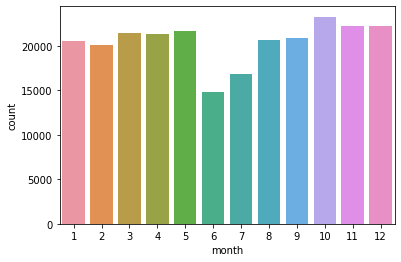

In [28]:
sns.countplot(x=df1_2017.month)

In [29]:
ports=df1_2017['port'].unique()

In [30]:
np.mean(df1_2017.loc[df1_2017['port']=='CARGO']['import_value'])

158865.75481009542

In [31]:
s=0
m=0
value_sum=[]
value_mean=[]
for x in ports:
    s=sum(df1_2017.loc[df1_2017['port']==x]['import_value'])
    m=np.mean(df1_2017.loc[df1_2017['port']==x]['import_value'])
    value_sum.append(s)
    value_mean.append(m)   

In [32]:
summary_2017=pd.DataFrame()

In [33]:
summary_2017['Port']=ports
summary_2017['Value_Sum']=value_sum
summary_2017['Value_mean']=value_mean

<BarContainer object of 3 artists>

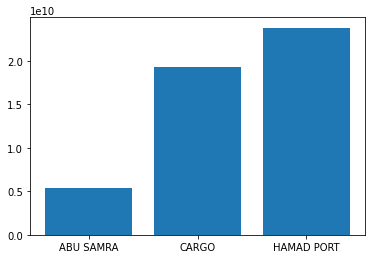

In [34]:
#Bar plot in 2 ways
plt.bar(summary_2017['Port'],summary_2017['Value_Sum'])



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


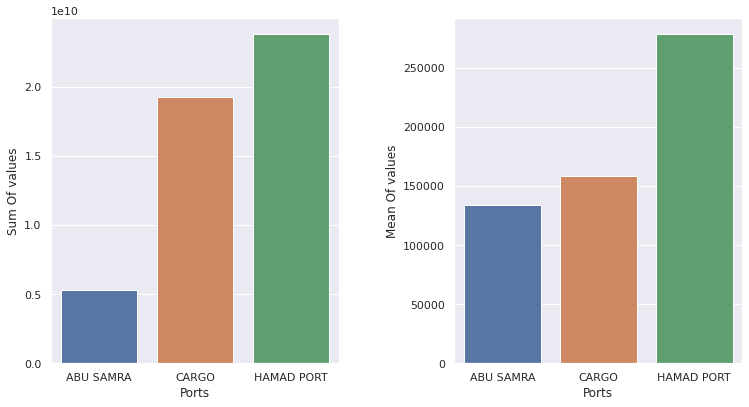

In [35]:
sns.set(style="darkgrid")

plt.figure(figsize=(12,6))


plt.subplot(1,2,1)
sns.barplot(summary_2017['Port'],summary_2017['Value_Sum'])
plt.xlabel("Ports")
plt.ylabel("Sum Of values")

plt.subplot(1,2,2)
sns.barplot(summary_2017['Port'],summary_2017['Value_mean'])
plt.xlabel("Ports")
plt.ylabel("Mean Of values")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [36]:
np.arange(len(summary_2017['Port']))

array([0, 1, 2])

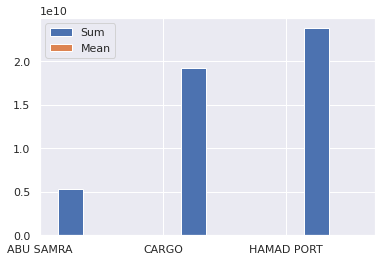

In [37]:
x=np.arange(len(summary_2017['Port']))


plt.bar(x+0.25,summary_2017['Value_Sum'],width=0.2,label="Sum")
plt.bar(x+0.25*2,summary_2017['Value_mean'],width=0.2,label="Mean")

plt.xticks(x,summary_2017['Port'])

plt.legend()
plt.show()

In [38]:
# 1.Make a new column/feature that has value/weight
# 2. Grpby the value/weight column/feature on the basis of continent

#Done

**Time Series Analysis**

In [39]:
#df1.drop(columns=['index'],inplace=True)
df1.head()

,index,iso3c,year,month,port,weight,import_value,continent,region
0,14920832,ITA,2017.0,1,ABU SAMRA,13.04,840.000,Europe,Southern Europe
1,4736231,USA,2018.0,4,CARGO,2.50,960.936,Americas,Northern America
2,17662810,HND,2016.0,8,ABU SAMRA,2568.00,38863.098,Americas,Central America
3,3974160,BIH,2017.0,2,CARGO,69.00,11337.320,Europe,Southern Europe
4,907099,IND,2018.0,9,CARGO,3.20,26.135,Asia,Southern Asia


In [40]:
df1.head()

,index,iso3c,year,month,port,weight,import_value,continent,region
0,14920832,ITA,2017.0,1,ABU SAMRA,13.04,840.000,Europe,Southern Europe
1,4736231,USA,2018.0,4,CARGO,2.50,960.936,Americas,Northern America
2,17662810,HND,2016.0,8,ABU SAMRA,2568.00,38863.098,Americas,Central America
3,3974160,BIH,2017.0,2,CARGO,69.00,11337.320,Europe,Southern Europe
4,907099,IND,2018.0,9,CARGO,3.20,26.135,Asia,Southern Asia


In [41]:
df1.set_index(['year','month'])['import_value'].mean()

201916.29364958804

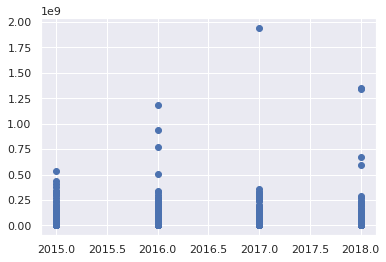

In [42]:
plt.scatter(df1.year,df1.import_value.values)

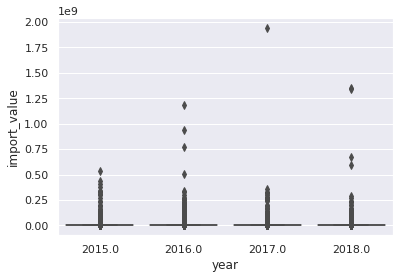

In [43]:
#Box plots in seaborn

ax = sns.boxplot(x="year", y="import_value", data=df1)

<AxesSubplot:xlabel='weight'>

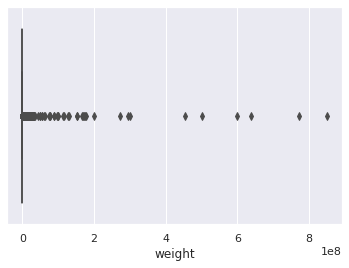

In [44]:
sns.boxplot(x=df1["weight"])

In [45]:
df1.shape

(1000000, 9)

In [46]:
grp_year=df1.groupby(['year','month']).mean()

<AxesSubplot:xlabel='year,month'>

<Figure size 720x1080 with 0 Axes>

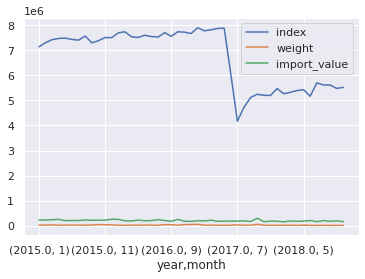

In [47]:
plt.figure(figsize=(10,15))
grp_year.plot()

In [48]:
grp_year.reset_index(inplace=True)

In [49]:
grp_year[grp_year['year']==2017]

,year,month,index,weight,import_value
24,2017.0,1,7.898054e+06,55961.249246,200412.860243
25,2017.0,2,7.776639e+06,20458.813795,190073.804304
26,2017.0,3,7.814332e+06,22694.471373,220450.758241
27,2017.0,4,7.870212e+06,19568.436905,175866.995820
28,2017.0,5,7.882233e+06,16702.976798,181336.999539
29,2017.0,6,6.051994e+06,22515.514598,184482.984269
30,2017.0,7,4.170896e+06,31210.605667,184313.333574
31,2017.0,8,4.729454e+06,20023.031129,196053.054710
32,2017.0,9,5.116194e+06,17834.750117,166972.246576
33,2017.0,10,5.244065e+06,58548.232597,298882.276014


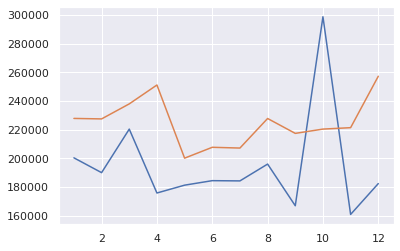

In [50]:
df17=grp_year[grp_year['year']==2017]
plt.plot(df17['month'],df17['import_value'])

df15=grp_year[grp_year['year']==2015]
plt.plot(df15['month'],df15['import_value'])

# Do this thing for all the years along with their labels and legends